# ドル円 15分足

### 一つ上のディレクトリをパスに追加

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [3]:
code = "USDJPY=X"
symbol = f"{code}"
ticker = yf.Ticker(symbol)
df = ticker.history(period='1d', interval='15m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-27 00:00:00+01:00,142.679993,142.705994,142.658997,142.701004,0,0.0,0.0
2025-05-27 00:15:00+01:00,142.703003,142.748001,142.694000,142.742996,0,0.0,0.0
2025-05-27 00:30:00+01:00,142.742004,142.742996,142.645996,142.654007,0,0.0,0.0
2025-05-27 00:45:00+01:00,142.651001,142.671997,142.612000,142.628998,0,0.0,0.0
2025-05-27 01:00:00+01:00,142.630005,142.630005,142.343994,142.389999,0,0.0,0.0
2025-05-27 01:15:00+01:00,142.391998,142.419006,142.278000,142.343002,0,0.0,0.0
2025-05-27 01:30:00+01:00,142.345001,142.376999,142.272003,142.324997,0,0.0,0.0
2025-05-27 01:45:00+01:00,142.326004,142.350998,142.244003,142.276993,0,0.0,0.0
2025-05-27 02:00:00+01:00,142.274994,142.279007,142.149994,142.184998,0,0.0,0.0


## 前日終値の取得

In [4]:
# 過去一週間のデータを取得
td = datetime.timedelta(days=7)
dt_first = df.index[0]
dt_prev = dt_first - td
df_last = ticker.history(period='1d', interval='1d', start=str(dt_prev.date()))
n = len(df_last)
lastclose = df_last[n-2:n-1]['Close'].iloc[0]
# 確認のため出力
df_last[n-2:n-1]['Close']

Date
2025-05-26 00:00:00+01:00    142.867004
Name: Close, dtype: float64

## ローソク足チャート（小さいサイズ）

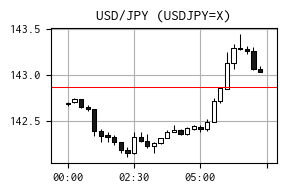

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.axhline(y=lastclose, color="red", linewidth=0.75)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()